# function estimation using neural network

In [1]:
# example of fitting a neural net on x vs x^2
%matplotlib inline 

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot

In [3]:
# define the dataset
# x = asarray([i for i in range(-50,51)])
x = np.arange(0,50,0.01)
# y = asarray([(i-1.0)/(2*i+1.0)  for i in x if (i != -0.5)])
y = asarray([(i-1.0)/(2*i+1.0)  for i in x if (i != -0.5)])
print(x.min(), x.max(), y.min(), y.max())
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
model.fit(x, y, epochs=550, batch_size=10, verbose=1)
# make predictions for the input data
yhat = model.predict(x)
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)


0.0 49.99 -1.0 0.4851455733808675
0.0 1.0 0.0 1.0
Epoch 1/550
500/500 [==============================] - 1s 1ms/step - loss: 0.1140
Epoch 2/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 3/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0026
Epoch 4/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0025
Epoch 5/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 6/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 7/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 8/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0023
Epoch 9/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 10/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 11/550
500/500 [==============================] - 1s 1ms/step - loss: 0.0021
Epoch 12/550
500/500 [========================

500/500 [==============================] - 0s 916us/step - loss: 2.3141e-04
Epoch 188/550
500/500 [==============================] - 0s 897us/step - loss: 2.2296e-04
Epoch 189/550
500/500 [==============================] - 0s 905us/step - loss: 2.3695e-04
Epoch 190/550
500/500 [==============================] - 0s 889us/step - loss: 2.3330e-04
Epoch 191/550
500/500 [==============================] - 0s 916us/step - loss: 2.2773e-04
Epoch 192/550
500/500 [==============================] - 0s 889us/step - loss: 2.2536e-04
Epoch 193/550
500/500 [==============================] - 0s 923us/step - loss: 2.3820e-04
Epoch 194/550
500/500 [==============================] - 0s 890us/step - loss: 2.2530e-04
Epoch 195/550
500/500 [==============================] - 0s 924us/step - loss: 2.2525e-04
Epoch 196/550
500/500 [==============================] - 0s 890us/step - loss: 2.1871e-04
Epoch 197/550
500/500 [==============================] - 0s 901us/step - loss: 2.2958e-04
Epoch 198/550
500/500 [=

500/500 [==============================] - 1s 1ms/step - loss: 1.5466e-04
Epoch 370/550
500/500 [==============================] - 1s 1ms/step - loss: 1.5731e-04
Epoch 371/550
500/500 [==============================] - 1s 1ms/step - loss: 1.5833e-04
Epoch 372/550
500/500 [==============================] - 1s 1ms/step - loss: 1.5599e-04
Epoch 373/550
500/500 [==============================] - 1s 1ms/step - loss: 1.7021e-04
Epoch 374/550
500/500 [==============================] - 1s 1ms/step - loss: 1.6336e-04
Epoch 375/550
500/500 [==============================] - 0s 912us/step - loss: 1.5788e-04
Epoch 376/550
500/500 [==============================] - 1s 1ms/step - loss: 1.4673e-04
Epoch 377/550
500/500 [==============================] - 1s 1ms/step - loss: 1.6672e-04
Epoch 378/550
500/500 [==============================] - 1s 1ms/step - loss: 1.5911e-04
Epoch 379/550
500/500 [==============================] - 0s 922us/step - loss: 1.6072e-04
Epoch 380/550
500/500 [===================

MSE::: 0.000
Root MSE::: 0.016
MAE::: 0.010


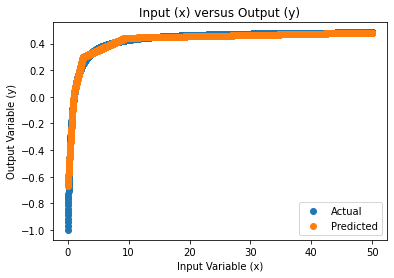

In [4]:
# report model error
print('MSE::: %.3f' % mean_squared_error(y_plot, yhat_plot))
print('Root MSE::: %.3f' % mean_squared_error(y_plot, yhat_plot) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y_plot, yhat_plot))
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()